# Using NLP for sentiment analysis
See https://huggingface.co/blog/sentiment-analysis-python
Also see https://ieeexplore.ieee.org/document/8848203

Note:the sentiment score is between 0 and 1 while textblob returns polarity score between -1 and 1.

"Sentiment analysis is a natural language processing technique that identifies the polarity of a given text. (cf. https://huggingface.co/blog/sentiment-analysis-python)


## Loading the data

In [23]:
## loading data

import pandas as pd

media_data = pd.read_csv("../test_data/media.csv", index_col = 0, parse_dates = ['pub_date'])

### Aplying threshhold filtering to the data

In [24]:
## Setting the threshold for the word frequency
from textblob import TextBlob

# freq = blob.word_counts['google']
word_threshold = 1

In [25]:
import nltk
nltk.download('punkt')

for i in range (len(media_data['text'])):
    blob = TextBlob(media_data['text'][i])
    if blob.word_counts['google'] < word_threshold:
        media_data = media_data.drop(i)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parhamhamidi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
display(media_data)

,pub_date,abstract,lead_paragraph,snippet,headline.main,text,Polarity,Sentiment
0,2022-10-25 20:37:03+00:00,Google’s parent company reported earnings that...,"Even Alphabet, the parent company of Google an...",Google’s parent company reported earnings that...,Alphabet’s Profit Drops 27 Percent From a Year...,Google’s parent company reported earnings that...,-0.478889,0.504897
1,2022-10-26 22:47:44+00:00,A series of quarterly earnings reports is show...,Google this week reported a steep decline in p...,A series of quarterly earnings reports is show...,Tech’s Biggest Companies Are Sending Worrying ...,A series of quarterly earnings reports is show...,0.027064,0.979738
2,2022-10-20 15:05:58+00:00,"Ken Paxton, the state attorney general, said p...",The Texas attorney general filed a privacy law...,"Ken Paxton, the state attorney general, said p...",Texas Sues Google for Collecting Biometric Dat...,"Ken Paxton, the state attorney general, said p...",-0.880557,0.902320
5,2022-10-13 19:26:02+00:00,Shares of the SPAC trying to merge with Donald...,The shares of the cash-rich special purpose ac...,Shares of the SPAC trying to merge with Donald...,Google’s Move to Include Truth Social in App S...,Shares of the SPAC trying to merge with Donald...,-0.824622,0.590450
6,2022-10-12 17:00:18+00:00,"Developed with Fitbit, Google’s first smart wa...","It’s 2022, and Google finally has a response t...","Developed with Fitbit, Google’s first smart wa...",The Google Watch Is Here. But You’d Better Lov...,"Developed with Fitbit, Google’s first smart wa...",0.910732,0.734579
...,...,...,...,...,...,...,...,...
93,2022-03-02 12:00:06+00:00,"The company, which is owned by Google, receive...","Fitbit, the Google-owned maker of health track...","The company, which is owned by Google, receive...",Fitbit recalls more than one million smart wat...,"The company, which is owned by Google, receive...",0.452706,0.417153
94,2022-01-06 22:25:32+00:00,The company will not be allowed to import prod...,"OAKLAND, Calif. — Google infringed on five aud...",The company will not be allowed to import prod...,"Google Infringed on Sonos Speaker Technology, ...",The company will not be allowed to import prod...,-0.679161,0.876380
96,2022-02-28 22:39:17+00:00,"Google, Meta, Twitter, Telegram and others are...",Russia’s invasion of Ukraine has become a defi...,"Google, Meta, Twitter, Telegram and others are...",Ukraine War Tests the Power of Tech Giants,"Google, Meta, Twitter, Telegram and others are...",0.974263,0.311431
98,2022-03-05 08:02:25+00:00,Russia’s attack may have you wondering what wi...,What if the lights go out? Or A.T.M. networks ...,Russia’s attack may have you wondering what wi...,A Paranoid Person’s Guide to Preparing for Dig...,Russia’s attack may have you wondering what wi...,-0.792587,0.219566


In [27]:
## making a new column called 'all_article-data' by concatenating the abstract, lead_paragraph columns, headline.main, text
# media_data['all_article_data'] = 'The abstact is: ' + media_data['abstract']+ '\n' + 'The lead paragraph is: ' + media_data['lead_paragraph'] + '\n' + 'The Headline is: ' + media_data['headline.main'] + '\n' + 'First part of text is: ' + media_data['text']

## Using OPT as a model
Using OPTForSequenceClassification as a model

In [28]:
from transformers import OPTConfig, AutoTokenizer, OPTForSequenceClassification
 
# Initializing a OPT facebook/opt-large style configuration
configuration = OPTConfig()

# Initializing a model (with random weights) from the facebook/opt-large style configuration
model_opt = OPTForSequenceClassification(configuration)

# Accessing the model configuration
configuration = model_opt.config

# Initializing a OPT tokenizer
tokenizer_opt = AutoTokenizer.from_pretrained("facebook/opt-350m")

In [29]:
from transformers import pipeline

# Sentiment analysis pipeline
analyzer = pipeline("sentiment-analysis", model= model_opt , tokenizer = tokenizer_opt)

In [30]:
## Apply the sentiment analysis pipeline to the text of each article in the media data

# initialize a list to store the sentiment scores
sentiment_scores = []

# loop through each article
for text in media_data['text']:
    # apply the sentiment analysis pipeline to the abstract
    sentiment_scores.append(analyzer(text)[0].get('score'))
    
# add the sentiment scores to the media data
media_data['OPT_sentiment-text'] = sentiment_scores

In [31]:
## looking at the articles with the highest and lowest OPT_sentiment_scores
max_score = media_data['OPT_sentiment-text'].max()
min_score = media_data['OPT_sentiment-text'].min()

## display the articles with the highest and lowest nlp_sentiment_scores
articles_with_max_score = media_data[media_data['OPT_sentiment-text'] == max_score]
articles_with_min_score = media_data[media_data['OPT_sentiment-text'] == min_score]

print("Article with the highest sentiment score was: \n'{}' with score {}, \n and the lowest sentiment score was: \n'{}' with score {}".format(articles_with_max_score['headline.main'].values[0], max_score, articles_with_min_score['headline.main'].values[0], min_score))

Article with the highest sentiment score was: 
'Text Messaging Is Cool. But Where Are Its Boundaries?' with score 0.8073587417602539, 
 and the lowest sentiment score was: 
'Fitbit recalls more than one million smart watches over a burn risk.' with score 0.5013436079025269


/var/folders/jy/pxlchpgj4_x9c0g18vrh75n40000gn/T/ipykernel_11693/2185964942.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_data['OPT_sentiment-text'])


Text(0, 0.5, 'Frequency')

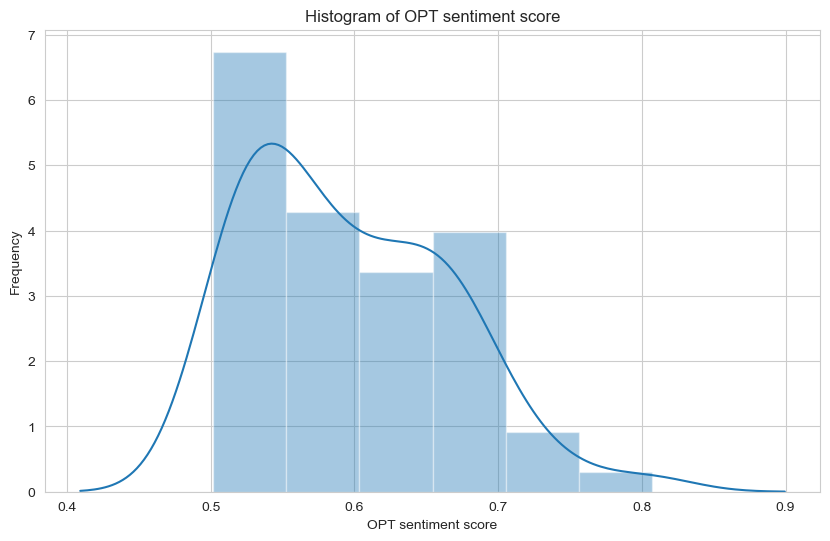

In [32]:
## plot a histogram of the OPT_sentiment_score-all_article_data column vs time of the media data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style( 'whitegrid' )

# set the plot size
plt.figure(figsize=(10, 6))

# plot a histogram of the OPT_sentiment_score-all_article_data column
sns.distplot(media_data['OPT_sentiment-text'])

# set the title and labels
plt.title('Histogram of OPT sentiment score')
plt.xlabel('OPT sentiment score')
plt.ylabel('Frequency')


## Using distilRoberta-financial-sentiment
See https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis


In [33]:

## initializing the new model and tokenizer

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_fin = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

model_fin = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [34]:
# Sentiment analysis pipeline with the new model and tokenizer
from transformers import pipeline

analyzer_fin = pipeline("sentiment-analysis", model= model_fin , tokenizer = tokenizer_fin)

In [35]:
## Apply analyzer_fin pipeline to the text of each article and recording the sentiment scores in a new column

# initialize a list to store the sentiment scores
sentiment_scores = []

# loop through each article
for text in media_data['text']:
    # apply the sentiment analysis pipeline to the abstract
    sentiment_scores.append(analyzer(text)[0].get('score'))
    
# add the sentiment scores to the media data
media_data['NLP_fin-sentiment-text'] = sentiment_scores


media_data.describe()

In [43]:
## looking at the articles with the highest and lowest NLP_fin-sentiment-text scores
max_score = media_data['NLP_fin-sentiment-text'].max()
min_score = media_data['NLP_fin-sentiment-text'].min()

## display the articles with the highest and lowest nlp_sentiment_scores
articles_with_max_score = media_data[media_data['NLP_fin-sentiment-text'] == max_score]
articles_with_min_score = media_data[media_data['NLP_fin-sentiment-text'] == min_score]

print("Article with the highest sentiment score was: \n'{}' with score {}, \n and the lowest sentiment score was: \n'{}' with score {}".format(articles_with_max_score['headline.main'].values[0], max_score, articles_with_min_score['headline.main'].values[0], min_score))

Article with the highest sentiment score was: 
'Google’s chief executive signed off on deal at center of antitrust case, states say.' with score 0.7567933201789856, 
 and the lowest sentiment score was: 
'Texas Sues Google for Collecting Biometric Data Without Consent' with score 0.501234233379364


/var/folders/jy/pxlchpgj4_x9c0g18vrh75n40000gn/T/ipykernel_11693/4196282180.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_data['NLP_fin-sentiment-text'])


Text(0, 0.5, 'Frequency')

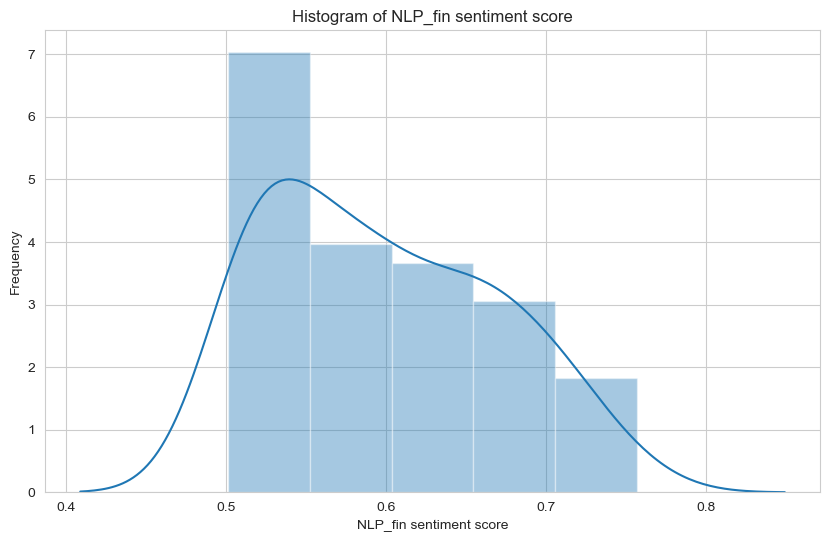

In [37]:
## plot a distogram of the NLP_fin-sentiment-text column vs its frequency
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style( 'whitegrid' )

# set the plot size
plt.figure(figsize=(10, 6))

# plot a histogram of the NLP_fin-sentiment-text column
sns.distplot(media_data['NLP_fin-sentiment-text'])

# set the title and labels
plt.title('Histogram of NLP_fin sentiment score')
plt.xlabel('NLP_fin sentiment score')
plt.ylabel('Frequency')

In [46]:
## adjusting the polarity scores to be between 0 and 1 (assume uniform distribution)

# initialize a list to store the adjusted sentiment scores
adjusted_polarity_scores = []

# loop through each sentiment score
for score in media_data['Polarity']:
    # adjust the sentiment score
    adjusted_polarity_scores.append((score + 1)/2)

# add the adjusted sentiment scores to the media data
media_data['adjusted_polarity'] = adjusted_polarity_scores

## Comparing the models (TextBlob, OPT, distilRoberta-financial-sentiment)

/var/folders/jy/pxlchpgj4_x9c0g18vrh75n40000gn/T/ipykernel_11693/3767902369.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(media_data['OPT_sentiment-text'], label = 'OPT sentiment scores')
/var/folders/jy/pxlchpgj4_x9c0g18vrh75n40000gn/T/ipykernel_11693/3767902369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

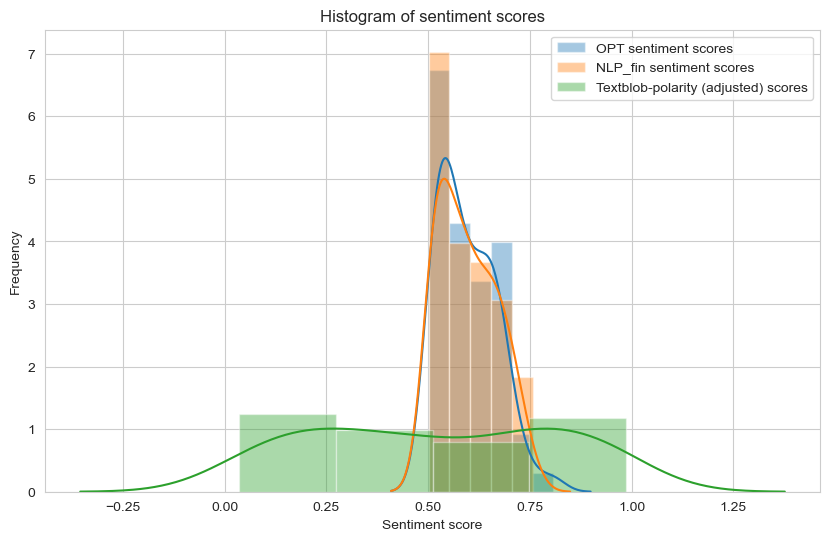

In [47]:
## comparing the OPT_sentiment-text,  NLP_fin-sentiment-text, and polarity scores columns using three histograms

# set the plot size
plt.figure(figsize=(10, 6))

# plot a histogram of the OPT_sentiment-text column
sns.distplot(media_data['OPT_sentiment-text'], label = 'OPT sentiment scores')

# plot a histogram of the NLP_fin-sentiment-text column
sns.distplot(media_data['NLP_fin-sentiment-text'], label = 'NLP_fin sentiment scores')

# plot a histogram of the polarity scores column
sns.distplot(media_data['adjusted_polarity'], label = 'Textblob-polarity (adjusted) scores')

# set the title and labels
plt.title('Histogram of sentiment scores')
plt.xlabel('Sentiment score')
plt.ylabel('Frequency')

# show the legend
plt.legend()

In [48]:
## finding the diference between the OPT_sentiment-text and NLP_fin-sentiment-text columns
media_data['difference'] = media_data['OPT_sentiment-text'] - media_data['NLP_fin-sentiment-text']

media_data['difference'].describe()

## looking at the articles with the highest and lowest difference scores
max_score = media_data['difference'].max()
min_score = media_data['difference'].min()

## display the articles with the highest and lowest difference scores
articles_with_max_score = media_data[media_data['difference'] == max_score]
articles_with_min_score = media_data[media_data['difference'] == min_score]

print("Article with the highest difference score was: \n'{}' with score {}, \n and the lowest difference score was: \n'{}' with score {}".format(articles_with_max_score['headline.main'].values[0], max_score, articles_with_min_score['headline.main'].values[0], min_score))


Article with the highest difference score was: 
'Text Messaging Is Cool. But Where Are Its Boundaries?' with score 0.21582776308059692, 
 and the lowest difference score was: 
'Fed Up With Google, Conspiracy Theorists Turn to DuckDuckGo' with score -0.20511209964752197
